In [1]:
%matplotlib inline
import nglview
import numpy as np
import matplotlib.pyplot as plt

# OpenMM 
from openmm.app import *
from openmm import *
from simtk.unit import *

In [2]:
# get my PDB

pdb = PDBFile('waterbox.pdb')

In [4]:
#everyother forcefield use path, change the forcefiled name for the xml files
#for the customizied forcefield use path_custom
#sorry I didn't want to put them in the same folder on my end


path = '/Users/mirandalu/Downloads/Courses/CHE 155/openmm_exercise/openmmforcefields-master/amber/files/tip3pfb.xml'
#path_custom = 'output.xml'
forcefield = ForceField(path)

In [5]:
system = forcefield.createSystem(pdb.topology,
                                 nonbondedMethod=PME,
                                 nonbondedCutoff=0.9*nanometer,
                                 rigidWater=True)

In [6]:
integrator = LangevinIntegrator(300,1,0.002)

In [7]:
monte_carlo = MonteCarloBarostat(1.0,300.)

In [8]:
platform = Platform.getPlatformByName('CPU')

In [9]:
simulation = Simulation(pdb.topology, system, integrator, platform)

In [10]:
simulation.context.setPositions(pdb.positions)

In [11]:
state = simulation.context.getState(getEnergy=True)
print(state.getPotentialEnergy())

-35965.52205583109 kJ/mol


In [12]:
#generate report, make sure to change the output file name
#the corresponding file names are tip3pfb, tip3p, and custom

reporter1 = StateDataReporter('custom.txt', 100, step=True, time = True, 
                              potentialEnergy=True, kineticEnergy=True, totalEnergy=True,
                             temperature=True, volume=True, density=True)
reporter2 = DCDReporter('custom.dcd', 100)
simulation.reporters.append(reporter1)
simulation.reporters.append(reporter2)

In [13]:
#2fs frame, so total 50000 steps total to make 1ms

simulation.step(50000)

In [14]:
#plot my outputs from VMD 

import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("tip3pfb.txt")
df = df.to_csv('tip3pfb.csv',index = 0)
df = pd.read_csv('tip3pfb.csv')

In [16]:
#calculate average density across all frames
#not sure why... but all of my files ended up having the same average density

average_density = np.mean(df.iloc[:, 7]).round(7)
print('The average density is',average_density,'g/mL')

The average density is 0.9916318 g/mL


Text(0, 0.5, 'g(r)')

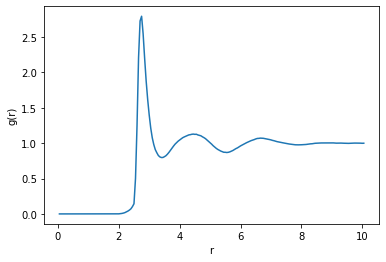

In [17]:
#plotting the experimental values

data = pd.read_csv('oo.als_bestfit.dat',sep = "	")
data.columns = ["r", "g(r)"]
data.astype(float)
data.head(5)
plt.plot(data['r'],data['g(r)'])
plt.xlabel('r')
plt.ylabel("g(r)")

Text(0, 0.5, 'g(r)')

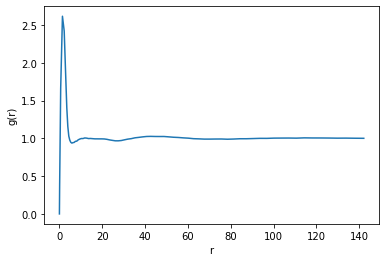

In [18]:
#plotting the tip3p forcefiled output

data = pd.read_csv('tip3p-oo.dat',sep = " ")
data.columns = ["time", "g(r)", "r"]
data.astype(float)
plt.plot(data['r'],data['g(r)'])
plt.xlabel('r')
plt.ylabel("g(r)")

Text(0, 0.5, 'g(r)')

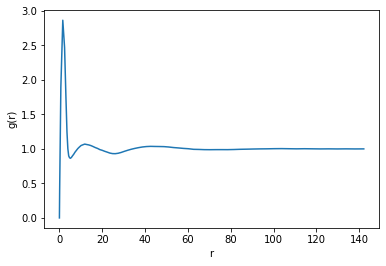

In [19]:
#plotting the tip3p-fb forcefiled output

data = pd.read_csv('tip3p-fb-oo.dat',sep = " ")
data.columns = ["time", "g(r)", "r"]
data.astype(float)
plt.plot(data['r'],data['g(r)'])
plt.xlabel('r')
plt.ylabel("g(r)")

In [20]:
#costumizing the tip3p-fb file, I meant to change the bond angle but I think it's not doing what I wanted 
#the output only changed the order of how each children element, the the value

import xml.etree.ElementTree as ET
tree = ET.parse(path)
root = tree.getroot()

# iterating through the price values.
for ii in root.iter('angle'):
    # updates the angle value
    ii = ii+10
    # creates a new attribute
    ii.set('new_Angle')
tree.write('output.xml')

Text(0, 0.5, 'g(r)')

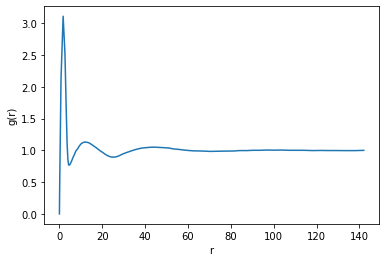

In [21]:
data = pd.read_csv('custom-oo.dat',sep = " ")
data.columns = ["time", "g(r)", "r"]
data.astype(float)
plt.plot(data['r'],data['g(r)'])
plt.xlabel('r')
plt.ylabel("g(r)")